In [3]:
%matplotlib inline

import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
top_tracks = pd.read_csv('irenewenting_toptracks.txt')
print(top_tracks)

    Unnamed: 0                                              album  \
0            0  {'album_type': 'ALBUM', 'external_urls': {'spo...   
1            1  {'album_type': 'ALBUM', 'external_urls': {'spo...   
2            2  {'album_type': 'ALBUM', 'external_urls': {'spo...   
3            3  {'album_type': 'ALBUM', 'external_urls': {'spo...   
4            4  {'album_type': 'ALBUM', 'external_urls': {'spo...   
5            5  {'album_type': 'ALBUM', 'external_urls': {'spo...   
6            6  {'album_type': 'ALBUM', 'external_urls': {'spo...   
7            7  {'album_type': 'ALBUM', 'external_urls': {'spo...   
8            8  {'album_type': 'ALBUM', 'external_urls': {'spo...   
9            9  {'album_type': 'ALBUM', 'external_urls': {'spo...   
10          10  {'album_type': 'ALBUM', 'external_urls': {'spo...   
11          11  {'album_type': 'SINGLE', 'external_urls': {'sp...   
12          12  {'album_type': 'ALBUM', 'external_urls': {'spo...   
13          13  {'album_type': 'AL

In [8]:
recommended_tracks = pd.read_csv('irenewenting_recommended_tracks.txt')
print(recommended_tracks.filter(items=['energy','valence','danceability']))

    energy  valence  danceability
0    0.536    0.296         0.688
1    0.508    0.236         0.703
2    0.534    0.558         0.725
3    0.492    0.336         0.673
4    0.532    0.390         0.580
5    0.545    0.599         0.464
6    0.595    0.299         0.254
7    0.584    0.784         0.883
8    0.564    0.718         0.582
9    0.580    0.443         0.813
10   0.503    0.559         0.696
11   0.583    0.422         0.718
12   0.585    0.198         0.238
13   0.583    0.545         0.709
14   0.524    0.370         0.704


In [10]:
remove = pd.read_csv('irenewenting_remove.txt')
print(remove.filter(items=['energy','valence','danceability']))

    energy  valence  danceability
0   0.0742   0.1500         0.274
1   0.0936   0.1900         0.511
2   0.1080   0.2020         0.462
3   0.1200   0.2280         0.260
4   0.1310   0.3200         0.538
5   0.1700   0.1450         0.494
6   0.2240   0.4660         0.383
7   0.2700   0.4040         0.575
8   0.2840   0.1140         0.398
9   0.3130   0.2580         0.322
10  0.3140   0.2960         0.671
11  0.3270   0.0928         0.302
12  0.3300   0.2680         0.458
13  0.3360   0.3920         0.444
14  0.3360   0.3240         0.431
15  0.3370   0.3620         0.595
16  0.3470   0.4180         0.515
17  0.3540   0.2200         0.535
18  0.3630   0.1450         0.372
19  0.3640   0.5910         0.564
20  0.3650   0.1910         0.494
21  0.3660   0.2190         0.645
22  0.3700   0.0913         0.318
23  0.3800   0.2490         0.509
24  0.3960   0.2800         0.535
25  0.4010   0.2400         0.540
26  0.4030   0.4850         0.607
27  0.4080   0.2910         0.733
28  0.4130   0

In [ ]:
with open('Eelco Wiechert_answers.txt', 'rb') as fp:
    itemlist = pickle.load(fp)

In [4]:
with open('Eelco Wiechert_answers.txt', 'rb') as fp:
    itemlist = pickle.load(fp)

print(itemlist)

# CREATE AN ENERGY DATAFRAME
itemlist_questions_energy = [x for x in itemlist if x['question'] == 'How would you rate the energy of the song?']
df = pd.DataFrame(itemlist_questions_energy)

print(df.head())

df['answer'] = df['answer'].astype(float)
df['seq'] = [0,1,2,3,4]

print(df.head())

# FIND ENERGY EVALUATION
for x in itemlist:
    try:
        energyEvaluation = x['overallEnergy']
    except:
        continue

[]
Empty DataFrame
Columns: []
Index: []


KeyError: 'answer'

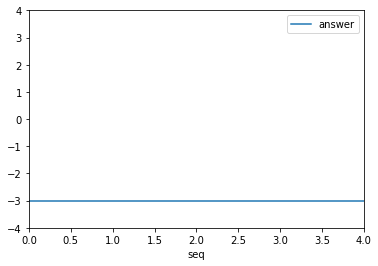

Average value: -3.0
Peak-end value: -3.0
Overall evaluation: 1


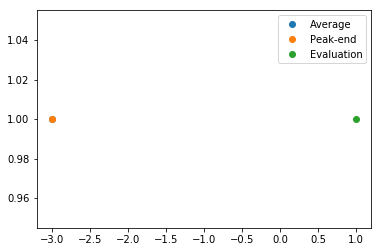

In [5]:
df.plot(x='seq',y="answer")
plt.ylim([-4,4])
plt.show()

# Calculate the average and peak-end value

average = sum(list(df['answer']))/len(list(df['answer']))
peak_end = (max(list(df['answer'])) + list(df['answer'])[4]) / 2

plotData = [average, peak_end, energyEvaluation]

print('Average value: %s' % average)
print('Peak-end value: %s' % peak_end)
print('Overall evaluation: %s' % energyEvaluation)

plt.plot(average, 1 * [1], "o", label='Average')
plt.plot(peak_end, 1 * [1], "o", label='Peak-end')
plt.plot(energyEvaluation, 1 * [1], "o",label="Evaluation")
plt.legend()
plt.show()